In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-paper')

## 1. Read the Dataset

### 1.1 File Info.
- 문서 앱내 사용시 발생하는 클라이언 로그 데이터 (after parsed)
- 서버로그와 달리, 유저의 행동이 발생할 경우 로그 수집 (유저 행동 패턴 파악에 용이)
    - 클라이언트(앱) 로그
    - 서버 로그

In [3]:
df = pd.read_csv("df_funnel.csv", index_col=0)

### 1.2 Columns Info.
- actiontype: 문서 이용시 행동(OPEN, CLOSE, SAVE,,)
- ismydoc: 내문서 해당 여부(중요x)
- ext: 문서 확장자
- sessionid: 유저 식별자
- documentposition: 문서 이용시 위치 정보(CLOUD, OTHERAPP)
- datetime: Timestamp
- screen: 앱내 화면 이름

In [3]:
df.head(5)

actiontype ismydoc  ext                         sessionid documentposition  \
0       OPEN  NoView  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE   
1      CLOSE  NoView  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE   
2       OPEN    View  PDF  9400fd2e43d7dc2d054ca78806236ee1   MYPOLARISDRIVE   
3      CLOSE    View  PDF  9400fd2e43d7dc2d054ca78806236ee1   MYPOLARISDRIVE   
4       OPEN  NoView  PDF  f191063c562691041dfa935ff0876975         OTHERAPP   

    datetime   screen  
0  2016.7.18  Per_Dir  
1  2016.7.18  Per_Dir  
2  2016.7.18  Pub_Dir  
3  2016.7.18  Pub_Dir  
4   2016.7.6     Main

In [4]:
df.tail(5)

actiontype ismydoc   ext                         sessionid  \
301856      CLOSE    View  XLSX  2ed068d5e6a72e80e4a997c01c59f782   
301857       OPEN  NoView  DOCX  41b8c1df291edd2aec30fc610e5b676e   
301858      RESET    View  DOCX  41b8c1df291edd2aec30fc610e5b676e   
301859       OPEN  NoView   PPT  9b5ee236571c2fcbe25132b6ba71d764   
301860      CLOSE  NoView   PPT  9b5ee236571c2fcbe25132b6ba71d764   

       documentposition   datetime screen  
301856         OTHERAPP   2016.7.7   Main  
301857         OTHERAPP   2016.7.5   Main  
301858         OTHERAPP   2016.7.5   Main  
301859         OTHERAPP  2016.7.14   Main  
301860         OTHERAPP  2016.7.14   Main

In [5]:
# key info => data entires, missing values, type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301861 entries, 0 to 301860
Data columns (total 7 columns):
actiontype          301861 non-null object
ismydoc             301861 non-null object
ext                 301861 non-null object
sessionid           301861 non-null object
documentposition    301861 non-null object
datetime            301861 non-null object
screen              301861 non-null object
dtypes: object(7)
memory usage: 18.4+ MB


## 2. Preprocessing
- 데이터 타입 변환
- 데이터 값 변경
- 결측치 처리
- 신규 session id 부여
- 대소문자 처리

### 2.1 날짜를 pandas datetime 형태로 변환하기
[Reference](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)

```python
pandas.to_datetime()
```

In [4]:
# if datetime is string? no sort 
df.groupby("datetime").size().head(15)

datetime
2016.7.1     11836
2016.7.10     6750
2016.7.11    10075
2016.7.12    12340
2016.7.13    12159
2016.7.14    11721
2016.7.15    11057
2016.7.16     8513
2016.7.17     6906
2016.7.18     9987
2016.7.19    11872
2016.7.2      8884
2016.7.20    11912
2016.7.21    11599
2016.7.22    11250
dtype: int64

In [5]:
## case 1. if date type is string,
str_date = ['2018/01/01', '2018.01.02', '2018-01-03', '2018-01-04', '2018/01/05'] # string type
str_date

['2018/01/01', '2018.01.02', '2018-01-03', '2018-01-04', '2018/01/05']

In [6]:
pd.to_datetime(str_date) # parsed

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05'],
              dtype='datetime64[ns]', freq=None)

In [7]:
pd.Series(pd.to_datetime(str_date)) # to pd.series

0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
dtype: datetime64[ns]

In [8]:
## case 2. 날짜가 timestamp인 경우
ts_date = [1349720105, 1349806505, 1349892905, 1349979305, 1350065705]
ts_date

[1349720105, 1349806505, 1349892905, 1349979305, 1350065705]

In [49]:
pd.Series(pd.to_datetime([1530837876, 1530751476, 1530665076, 1530578676, 1530492276], unit='s')).dt.date

0    2018-07-06
1    2018-07-05
2    2018-07-04
3    2018-07-03
4    2018-07-02
dtype: object

- timestamp converter: https://www.epochconverter.com/

In [41]:
## case 3. 컬럼 타입만 바꾸는 경우
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301861 entries, 0 to 301860
Data columns (total 7 columns):
actiontype          301861 non-null object
ismydoc             301861 non-null object
ext                 301861 non-null object
sessionid           301861 non-null object
documentposition    301861 non-null object
datetime            301861 non-null object
screen              301861 non-null object
dtypes: object(7)
memory usage: 18.4+ MB


In [50]:
df.head() # object = string

actiontype ismydoc  ext                         sessionid documentposition  \
0       OPEN  NoView  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE   
1      CLOSE  NoView  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE   
2       OPEN    View  PDF  9400fd2e43d7dc2d054ca78806236ee1   MYPOLARISDRIVE   
3      CLOSE    View  PDF  9400fd2e43d7dc2d054ca78806236ee1   MYPOLARISDRIVE   
4       OPEN  NoView  PDF  f191063c562691041dfa935ff0876975         OTHERAPP   

    datetime   screen  
0  2016.7.18  Per_Dir  
1  2016.7.18  Per_Dir  
2  2016.7.18  Pub_Dir  
3  2016.7.18  Pub_Dir  
4   2016.7.6     Main

In [51]:
# option1. string to datetime
df['datetime'].astype('datetime64[ns]').head()

0   2016-07-18
1   2016-07-18
2   2016-07-18
3   2016-07-18
4   2016-07-06
Name: datetime, dtype: datetime64[ns]

In [52]:
# option2.
pd.to_datetime(df['datetime']).head()

0   2016-07-18
1   2016-07-18
2   2016-07-18
3   2016-07-18
4   2016-07-06
Name: datetime, dtype: datetime64[ns]

In [53]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301861 entries, 0 to 301860
Data columns (total 7 columns):
actiontype          301861 non-null object
ismydoc             301861 non-null object
ext                 301861 non-null object
sessionid           301861 non-null object
documentposition    301861 non-null object
datetime            301861 non-null datetime64[ns]
screen              301861 non-null object
dtypes: datetime64[ns](1), object(6)
memory usage: 18.4+ MB


In [55]:
df.head()

actiontype ismydoc  ext                         sessionid documentposition  \
0       OPEN  NoView  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE   
1      CLOSE  NoView  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE   
2       OPEN    View  PDF  9400fd2e43d7dc2d054ca78806236ee1   MYPOLARISDRIVE   
3      CLOSE    View  PDF  9400fd2e43d7dc2d054ca78806236ee1   MYPOLARISDRIVE   
4       OPEN  NoView  PDF  f191063c562691041dfa935ff0876975         OTHERAPP   

    datetime   screen  
0 2016-07-18  Per_Dir  
1 2016-07-18  Per_Dir  
2 2016-07-18  Pub_Dir  
3 2016-07-18  Pub_Dir  
4 2016-07-06     Main

In [56]:
df.groupby("datetime").size()#.plot()

datetime
2016-07-01    11836
2016-07-02     8884
2016-07-03     6334
2016-07-04     9260
2016-07-05    10988
2016-07-06    10525
2016-07-07    10153
2016-07-08    10522
2016-07-09     8283
2016-07-10     6750
2016-07-11    10075
2016-07-12    12340
2016-07-13    12159
2016-07-14    11721
2016-07-15    11057
2016-07-16     8513
2016-07-17     6906
2016-07-18     9987
2016-07-19    11872
2016-07-20    11912
2016-07-21    11599
2016-07-22    11250
2016-07-23     8390
2016-07-24     6813
2016-07-25    10081
2016-07-26    12034
2016-07-27    11593
2016-07-28    11216
2016-07-29    10721
2016-07-30     8087
dtype: int64

- Pandas Datetime API
    - https://pandas.pydata.org/pandas-docs/stable/timeseries.html
    - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.html

In [57]:
# day to year
df['datetime'].dt.year[:10]

0    2016
1    2016
2    2016
3    2016
4    2016
5    2016
6    2016
7    2016
8    2016
9    2016
Name: datetime, dtype: int64

In [58]:
# day to month
df['datetime'].dt.month[:10]

0    7
1    7
2    7
3    7
4    7
5    7
6    7
7    7
8    7
9    7
Name: datetime, dtype: int64

In [59]:
# day to day
df['datetime'].dt.day[:10]

0    18
1    18
2    18
3    18
4     6
5     6
6    20
7    20
8    28
9    28
Name: datetime, dtype: int64

### 2.2 Missing value 확인

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301861 entries, 0 to 301860
Data columns (total 7 columns):
actiontype          301861 non-null object
ismydoc             301861 non-null object
ext                 301861 non-null object
sessionid           301861 non-null object
documentposition    301861 non-null object
datetime            301861 non-null datetime64[ns]
screen              301861 non-null object
dtypes: datetime64[ns](1), object(6)
memory usage: 18.4+ MB


In [23]:
df.isnull().sum()

actiontype          0
ismydoc             0
ext                 0
sessionid           0
documentposition    0
datetime            0
screen              0
dtype: int64

### 2.3 결측치 처리

- **Drop**
    - 경우에 따라 결측치 처리 방법이 달라진다.
    - 샘플수가 많다면 missing values 를 포함하는 행을 모두 삭제하는 것이 가능하다

```python
# 결측치가 하나라도 있으면 버리는 코드 예제
df.dropna()

# 모든 값이 Null일 경우만 버리는 코드 예제
df.dropna(how='all')

# 결측치가 하나 이상 있는 Case만 선택하는 코드 예제
df[df.isnull().any(axis=1)]
```

- **Imputation**
    - 만약 샘플수가 충분하지 않을 경우, Pandas의 fillna() 명령어로 Null 값을 채우는 것이 가능하다. 
    - 연속형인 경우 Mean이나 Median을 이용하고 명목형인 경우 Mode(최빈치)나 예측 모형을 통해 Null 값을 대체할 수 있다.

```python
# Null 값을 median으로 대체하는 코드 예제
df.fillna(df.mean()) 
```

- **Reference**
    - https://machinelearningmastery.com/handle-missing-data-python/

In [24]:
df_by_screen = df.groupby(["datetime", "screen"])['sessionid'].nunique().unstack()

df_by_screen[:10]

screen      InProduct_Mob  InProduct_Web    Main  Per_Dir  Pub_Dir  \
datetime                                                             
2016-07-01          137.0          147.0  3582.0    296.0   1008.0   
2016-07-02           89.0          124.0  2683.0    206.0    801.0   
2016-07-03           50.0           83.0  1886.0    165.0    590.0   
2016-07-04          112.0          104.0  2808.0    281.0    764.0   
2016-07-05          118.0          138.0  3335.0    300.0    842.0   
2016-07-06          138.0          145.0  3256.0    293.0    855.0   
2016-07-07          110.0          117.0  3150.0    266.0    807.0   
2016-07-08          117.0          148.0  3208.0    273.0    865.0   
2016-07-09          102.0          138.0  2381.0    229.0    748.0   
2016-07-10           62.0          122.0  1872.0    230.0    636.0   

screen      Purchase_done  Purchase_page  
datetime                                  
2016-07-01            2.0           23.0  
2016-07-02            2.0           15.0  
2016-07-03            NaN           28.0  
2016-07-04            NaN           29.0  
2016-07-05            1.0           26.0  
2016-07-06            1.0           30.0  
2016-07-07            NaN           18.0  
2016-07-08            2.0           20.0  
2016-07-09            2.0           23.0  
2016-07-10            2.0           18.0

In [25]:
df_by_screen.isnull().sum()

screen
InProduct_Mob    0
InProduct_Web    0
Main             0
Per_Dir          0
Pub_Dir          0
Purchase_done    6
Purchase_page    0
dtype: int64

In [26]:
df_by_screen.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2016-07-01 to 2016-07-30
Data columns (total 7 columns):
InProduct_Mob    30 non-null float64
InProduct_Web    30 non-null float64
Main             30 non-null float64
Per_Dir          30 non-null float64
Pub_Dir          30 non-null float64
Purchase_done    24 non-null float64
Purchase_page    30 non-null float64
dtypes: float64(7)
memory usage: 1.9 KB


- 비즈니스 맥락 및 목적(퍼널분석)을 고려했을 때, 이 경우는 결측치를 0으로 처리하는 것이 적당하다고 판단됨.

In [27]:
df_by_screen.fillna(0)[:10]

screen      InProduct_Mob  InProduct_Web    Main  Per_Dir  Pub_Dir  \
datetime                                                             
2016-07-01          137.0          147.0  3582.0    296.0   1008.0   
2016-07-02           89.0          124.0  2683.0    206.0    801.0   
2016-07-03           50.0           83.0  1886.0    165.0    590.0   
2016-07-04          112.0          104.0  2808.0    281.0    764.0   
2016-07-05          118.0          138.0  3335.0    300.0    842.0   
2016-07-06          138.0          145.0  3256.0    293.0    855.0   
2016-07-07          110.0          117.0  3150.0    266.0    807.0   
2016-07-08          117.0          148.0  3208.0    273.0    865.0   
2016-07-09          102.0          138.0  2381.0    229.0    748.0   
2016-07-10           62.0          122.0  1872.0    230.0    636.0   

screen      Purchase_done  Purchase_page  
datetime                                  
2016-07-01            2.0           23.0  
2016-07-02            2.0           15.0  
2016-07-03            0.0           28.0  
2016-07-04            0.0           29.0  
2016-07-05            1.0           26.0  
2016-07-06            1.0           30.0  
2016-07-07            0.0           18.0  
2016-07-08            2.0           20.0  
2016-07-09            2.0           23.0  
2016-07-10            2.0           18.0

In [28]:
# dropna with 'how' param
df_by_screen.dropna(how='any')[:10] # how='all' or 'any'

screen      InProduct_Mob  InProduct_Web    Main  Per_Dir  Pub_Dir  \
datetime                                                             
2016-07-01          137.0          147.0  3582.0    296.0   1008.0   
2016-07-02           89.0          124.0  2683.0    206.0    801.0   
2016-07-05          118.0          138.0  3335.0    300.0    842.0   
2016-07-06          138.0          145.0  3256.0    293.0    855.0   
2016-07-08          117.0          148.0  3208.0    273.0    865.0   
2016-07-09          102.0          138.0  2381.0    229.0    748.0   
2016-07-10           62.0          122.0  1872.0    230.0    636.0   
2016-07-12          138.0          157.0  3646.0    371.0   1000.0   
2016-07-13          132.0          172.0  3544.0    334.0    988.0   
2016-07-14          131.0          153.0  3479.0    364.0    923.0   

screen      Purchase_done  Purchase_page  
datetime                                  
2016-07-01            2.0           23.0  
2016-07-02            2.0           15.0  
2016-07-05            1.0           26.0  
2016-07-06            1.0           30.0  
2016-07-08            2.0           20.0  
2016-07-09            2.0           23.0  
2016-07-10            2.0           18.0  
2016-07-12            4.0           26.0  
2016-07-13            1.0           35.0  
2016-07-14            5.0           16.0

In [29]:
df_by_screen.dropna(how='all')[:10] # how='all' or 'any'

screen      InProduct_Mob  InProduct_Web    Main  Per_Dir  Pub_Dir  \
datetime                                                             
2016-07-01          137.0          147.0  3582.0    296.0   1008.0   
2016-07-02           89.0          124.0  2683.0    206.0    801.0   
2016-07-03           50.0           83.0  1886.0    165.0    590.0   
2016-07-04          112.0          104.0  2808.0    281.0    764.0   
2016-07-05          118.0          138.0  3335.0    300.0    842.0   
2016-07-06          138.0          145.0  3256.0    293.0    855.0   
2016-07-07          110.0          117.0  3150.0    266.0    807.0   
2016-07-08          117.0          148.0  3208.0    273.0    865.0   
2016-07-09          102.0          138.0  2381.0    229.0    748.0   
2016-07-10           62.0          122.0  1872.0    230.0    636.0   

screen      Purchase_done  Purchase_page  
datetime                                  
2016-07-01            2.0           23.0  
2016-07-02            2.0           15.0  
2016-07-03            NaN           28.0  
2016-07-04            NaN           29.0  
2016-07-05            1.0           26.0  
2016-07-06            1.0           30.0  
2016-07-07            NaN           18.0  
2016-07-08            2.0           20.0  
2016-07-09            2.0           23.0  
2016-07-10            2.0           18.0

In [30]:
# select ony rows, including NaN
df_by_screen[df_by_screen.isnull().any(axis=1)]

screen      InProduct_Mob  InProduct_Web    Main  Per_Dir  Pub_Dir  \
datetime                                                             
2016-07-03           50.0           83.0  1886.0    165.0    590.0   
2016-07-04          112.0          104.0  2808.0    281.0    764.0   
2016-07-07          110.0          117.0  3150.0    266.0    807.0   
2016-07-11          125.0          139.0  2944.0    332.0    801.0   
2016-07-18          133.0          162.0  2882.0    317.0    841.0   
2016-07-19          124.0          137.0  3552.0    331.0    934.0   

screen      Purchase_done  Purchase_page  
datetime                                  
2016-07-03            NaN           28.0  
2016-07-04            NaN           29.0  
2016-07-07            NaN           18.0  
2016-07-11            NaN           26.0  
2016-07-18            NaN           30.0  
2016-07-19            NaN           24.0

In [31]:
# fill NaN with median
df_by_screen.fillna(df_by_screen.median())[:10] # mean, max, min ..

screen      InProduct_Mob  InProduct_Web    Main  Per_Dir  Pub_Dir  \
datetime                                                             
2016-07-01          137.0          147.0  3582.0    296.0   1008.0   
2016-07-02           89.0          124.0  2683.0    206.0    801.0   
2016-07-03           50.0           83.0  1886.0    165.0    590.0   
2016-07-04          112.0          104.0  2808.0    281.0    764.0   
2016-07-05          118.0          138.0  3335.0    300.0    842.0   
2016-07-06          138.0          145.0  3256.0    293.0    855.0   
2016-07-07          110.0          117.0  3150.0    266.0    807.0   
2016-07-08          117.0          148.0  3208.0    273.0    865.0   
2016-07-09          102.0          138.0  2381.0    229.0    748.0   
2016-07-10           62.0          122.0  1872.0    230.0    636.0   

screen      Purchase_done  Purchase_page  
datetime                                  
2016-07-01            2.0           23.0  
2016-07-02            2.0           15.0  
2016-07-03            2.0           28.0  
2016-07-04            2.0           29.0  
2016-07-05            1.0           26.0  
2016-07-06            1.0           30.0  
2016-07-07            2.0           18.0  
2016-07-08            2.0           20.0  
2016-07-09            2.0           23.0  
2016-07-10            2.0           18.0

### 2.4 결측치가 카테고리 변수인 경우
- Option 1. 최빈치(mode)
    - 쉽고 빠르게 이용가능하나, 낮은 적절성
- Option 2. 예측모형으로 예측치
    - 적절성은 비교적 높으나 별도의 모형과 계산량 필요

In [32]:
df.head(10)

actiontype ismydoc  ext                         sessionid documentposition  \
0       OPEN  NoView  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE   
1      CLOSE  NoView  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE   
2       OPEN    View  PDF  9400fd2e43d7dc2d054ca78806236ee1   MYPOLARISDRIVE   
3      CLOSE    View  PDF  9400fd2e43d7dc2d054ca78806236ee1   MYPOLARISDRIVE   
4       OPEN  NoView  PDF  f191063c562691041dfa935ff0876975         OTHERAPP   
5      RESET    View  PDF  f191063c562691041dfa935ff0876975         OTHERAPP   
6      CLOSE  NoView  PDF  3747719d8f6bdd334703320433928d5a         OTHERAPP   
7       OPEN  NoView  PDF  3747719d8f6bdd334703320433928d5a         OTHERAPP   
8       OPEN  NoView  PDF  3da5ab986c93803de1e25012d9972274         OTHERAPP   
9      CLOSE  NoView  PDF  3da5ab986c93803de1e25012d9972274         OTHERAPP   

    datetime   screen  
0 2016-07-18  Per_Dir  
1 2016-07-18  Per_Dir  
2 2016-07-18  Pub_Dir  
3 2016-07-18  Pub_Dir  
4 2016-07-06     Main  
5 2016-07-06     Main  
6 2016-07-20     Main  
7 2016-07-20     Main  
8 2016-07-28     Main  
9 2016-07-28     Main

In [33]:
df_ms = df.copy() # it helps to test any code or functions

df_ms.ix[2, 'documentposition'] = np.nan
df_ms.ix[5, 'documentposition'] = np.nan
df_ms.ix[7, 'documentposition'] = np.nan
df_ms.ix[10, 'documentposition'] = np.nan
df_ms.ix[11, 'documentposition'] = np.nan
df_ms.ix[15, 'documentposition'] = np.nan

In [34]:
df_ms.head(10)

actiontype ismydoc  ext                         sessionid documentposition  \
0       OPEN  NoView  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE   
1      CLOSE  NoView  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE   
2       OPEN    View  PDF  9400fd2e43d7dc2d054ca78806236ee1              NaN   
3      CLOSE    View  PDF  9400fd2e43d7dc2d054ca78806236ee1   MYPOLARISDRIVE   
4       OPEN  NoView  PDF  f191063c562691041dfa935ff0876975         OTHERAPP   
5      RESET    View  PDF  f191063c562691041dfa935ff0876975              NaN   
6      CLOSE  NoView  PDF  3747719d8f6bdd334703320433928d5a         OTHERAPP   
7       OPEN  NoView  PDF  3747719d8f6bdd334703320433928d5a              NaN   
8       OPEN  NoView  PDF  3da5ab986c93803de1e25012d9972274         OTHERAPP   
9      CLOSE  NoView  PDF  3da5ab986c93803de1e25012d9972274         OTHERAPP   

    datetime   screen  
0 2016-07-18  Per_Dir  
1 2016-07-18  Per_Dir  
2 2016-07-18  Pub_Dir  
3 2016-07-18  Pub_Dir  
4 2016-07-06     Main  
5 2016-07-06     Main  
6 2016-07-20     Main  
7 2016-07-20     Main  
8 2016-07-28     Main  
9 2016-07-28     Main

In [35]:
# frequency table
df_ms.documentposition.value_counts()

OTHERAPP          213775
MYPOLARISDRIVE     55518
LOCALSTORAGE       18922
NEWDOCUMENT         7612
NONE                4335
OTHERCLOUD          1617
SHAREDDOCUMENT        76
Name: documentposition, dtype: int64

In [36]:
# fillna with most frequent value (MODE)
freq_values = df_ms.documentposition.value_counts().index[0]

freq_values

'OTHERAPP'

In [37]:
df_ms['documentposition'] = df_ms['documentposition'].fillna(freq_values)

In [38]:
df_ms.head(10)

actiontype ismydoc  ext                         sessionid documentposition  \
0       OPEN  NoView  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE   
1      CLOSE  NoView  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE   
2       OPEN    View  PDF  9400fd2e43d7dc2d054ca78806236ee1         OTHERAPP   
3      CLOSE    View  PDF  9400fd2e43d7dc2d054ca78806236ee1   MYPOLARISDRIVE   
4       OPEN  NoView  PDF  f191063c562691041dfa935ff0876975         OTHERAPP   
5      RESET    View  PDF  f191063c562691041dfa935ff0876975         OTHERAPP   
6      CLOSE  NoView  PDF  3747719d8f6bdd334703320433928d5a         OTHERAPP   
7       OPEN  NoView  PDF  3747719d8f6bdd334703320433928d5a         OTHERAPP   
8       OPEN  NoView  PDF  3da5ab986c93803de1e25012d9972274         OTHERAPP   
9      CLOSE  NoView  PDF  3da5ab986c93803de1e25012d9972274         OTHERAPP   

    datetime   screen  
0 2016-07-18  Per_Dir  
1 2016-07-18  Per_Dir  
2 2016-07-18  Pub_Dir  
3 2016-07-18  Pub_Dir  
4 2016-07-06     Main  
5 2016-07-06     Main  
6 2016-07-20     Main  
7 2016-07-20     Main  
8 2016-07-28     Main  
9 2016-07-28     Main

In [39]:
# let's use a machine learning model to deal with nulls
df_ms.ix[2, 'documentposition'] = np.nan
df_ms.ix[5, 'documentposition'] = np.nan
df_ms.ix[7, 'documentposition'] = np.nan
df_ms.ix[10, 'documentposition'] = np.nan
df_ms.ix[11, 'documentposition'] = np.nan
df_ms.ix[15, 'documentposition'] = np.nan

df_ms.head(10)

actiontype ismydoc  ext                         sessionid documentposition  \
0       OPEN  NoView  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE   
1      CLOSE  NoView  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE   
2       OPEN    View  PDF  9400fd2e43d7dc2d054ca78806236ee1              NaN   
3      CLOSE    View  PDF  9400fd2e43d7dc2d054ca78806236ee1   MYPOLARISDRIVE   
4       OPEN  NoView  PDF  f191063c562691041dfa935ff0876975         OTHERAPP   
5      RESET    View  PDF  f191063c562691041dfa935ff0876975              NaN   
6      CLOSE  NoView  PDF  3747719d8f6bdd334703320433928d5a         OTHERAPP   
7       OPEN  NoView  PDF  3747719d8f6bdd334703320433928d5a              NaN   
8       OPEN  NoView  PDF  3da5ab986c93803de1e25012d9972274         OTHERAPP   
9      CLOSE  NoView  PDF  3da5ab986c93803de1e25012d9972274         OTHERAPP   

    datetime   screen  
0 2016-07-18  Per_Dir  
1 2016-07-18  Per_Dir  
2 2016-07-18  Pub_Dir  
3 2016-07-18  Pub_Dir  
4 2016-07-06     Main  
5 2016-07-06     Main  
6 2016-07-20     Main  
7 2016-07-20     Main  
8 2016-07-28     Main  
9 2016-07-28     Main

In [40]:
# fill na using predictive model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# train without na
df_ms1 = df_ms.dropna()

# set independent cols
ind_cols = ['actiontype', 'ismydoc', 'ext', 'screen']

# split ind, tar
X = df_ms1[ind_cols]
y = df_ms1[['documentposition']]

In [41]:
X.head(10) # independent vars

actiontype ismydoc  ext   screen
0        OPEN  NoView  PDF  Per_Dir
1       CLOSE  NoView  PDF  Per_Dir
3       CLOSE    View  PDF  Pub_Dir
4        OPEN  NoView  PDF     Main
6       CLOSE  NoView  PDF     Main
8        OPEN  NoView  PDF     Main
9       CLOSE  NoView  PDF     Main
12      CLOSE  NoView  PDF     Main
13      RESET    View  PDF     Main
14       OPEN    View  PDF  Pub_Dir

In [42]:
y[:10] # target vars

documentposition
0      LOCALSTORAGE
1      LOCALSTORAGE
3    MYPOLARISDRIVE
4          OTHERAPP
6          OTHERAPP
8          OTHERAPP
9          OTHERAPP
12         OTHERAPP
13         OTHERAPP
14   MYPOLARISDRIVE

In [43]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

X = X.apply(lambda x: encoder.fit_transform(x))
y = y.apply(lambda y: encoder.fit_transform(y))

In [44]:
X.head(10)

actiontype  ismydoc  ext  screen
0            3        0    5       3
1            0        0    5       3
3            0        1    5       4
4            3        0    5       2
6            0        0    5       2
8            3        0    5       2
9            0        0    5       2
12           0        0    5       2
13           4        1    5       2
14           3        1    5       4

In [45]:
y[:10]

documentposition
0                  0
1                  0
3                  1
4                  4
6                  4
8                  4
9                  4
12                 4
13                 4
14                 1

In [46]:
## the cross validation phase
# X: df_ms_ind / y: df_ms_tar

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [47]:
print(X.shape)
print(y.shape)

(301855, 4)
(301855, 1)


In [48]:
print(X_train.shape, y_train.shape)

((226391, 4), (226391, 1))


In [49]:
print(X_test.shape, y_test.shape)

((75464, 4), (75464, 1))


[KNN Algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
![img](https://i0.wp.com/adataanalyst.com/wp-content/uploads/2016/07/kNN-1.png?)

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [51]:
print(knn.score(X_train, y_train)) # Quiz. score 의미가 무엇일까?

0.9998719030350146


In [52]:
print(knn.score(X_test, y_test)) # 만약 train 에서 score가 높고 test에서 score가 낮았다면?

0.9997879783737941


In [53]:
knn_pred = knn.predict(X_test)
knn_pred[:20]

array([1, 4, 4, 4, 4, 1, 4, 1, 4, 4, 4, 2, 4, 1, 4, 0, 4, 1, 4, 4])

In [54]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, knn_pred))

[[ 4733     0     0     0     3     0     0]
 [    2 13895     0     0     0     0     0]
 [    0     0  1920     0     3     0     0]
 [    0     0     2  1085     0     0     0]
 [    1     0     1     0 53383     0     0]
 [    0     1     0     0     0   413     0]
 [    0     3     0     0     0     0    19]]


In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, knn_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      4736
          1       1.00      1.00      1.00     13897
          2       1.00      1.00      1.00      1923
          3       1.00      1.00      1.00      1087
          4       1.00      1.00      1.00     53385
          5       1.00      1.00      1.00       414
          6       1.00      0.86      0.93        22

avg / total       1.00      1.00      1.00     75464



In [56]:
pd.Series(knn_pred).value_counts().sort_index()

0     4736
1    13899
2     1923
3     1085
4    53389
5      413
6       19
dtype: int64

In [57]:
class_cd = pd.Series(encoder.classes_).to_dict()

class_cd

{0: 'LOCALSTORAGE',
 1: 'MYPOLARISDRIVE',
 2: 'NEWDOCUMENT',
 3: 'NONE',
 4: 'OTHERAPP',
 5: 'OTHERCLOUD',
 6: 'SHAREDDOCUMENT'}

In [58]:
# let's impute the null values with the knn predictive model
df_ms.head(10)

actiontype ismydoc  ext                         sessionid documentposition  \
0       OPEN  NoView  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE   
1      CLOSE  NoView  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE   
2       OPEN    View  PDF  9400fd2e43d7dc2d054ca78806236ee1              NaN   
3      CLOSE    View  PDF  9400fd2e43d7dc2d054ca78806236ee1   MYPOLARISDRIVE   
4       OPEN  NoView  PDF  f191063c562691041dfa935ff0876975         OTHERAPP   
5      RESET    View  PDF  f191063c562691041dfa935ff0876975              NaN   
6      CLOSE  NoView  PDF  3747719d8f6bdd334703320433928d5a         OTHERAPP   
7       OPEN  NoView  PDF  3747719d8f6bdd334703320433928d5a              NaN   
8       OPEN  NoView  PDF  3da5ab986c93803de1e25012d9972274         OTHERAPP   
9      CLOSE  NoView  PDF  3da5ab986c93803de1e25012d9972274         OTHERAPP   

    datetime   screen  
0 2016-07-18  Per_Dir  
1 2016-07-18  Per_Dir  
2 2016-07-18  Pub_Dir  
3 2016-07-18  Pub_Dir  
4 2016-07-06     Main  
5 2016-07-06     Main  
6 2016-07-20     Main  
7 2016-07-20     Main  
8 2016-07-28     Main  
9 2016-07-28     Main

In [59]:
df_ms.isnull().sum()

actiontype          0
ismydoc             0
ext                 0
sessionid           0
documentposition    6
datetime            0
screen              0
dtype: int64

In [60]:
df_ms_only = df_ms[df_ms.isnull().any(axis=1)]

df_ms_only

actiontype ismydoc  ext                         sessionid documentposition  \
2        OPEN    View  PDF  9400fd2e43d7dc2d054ca78806236ee1              NaN   
5       RESET    View  PDF  f191063c562691041dfa935ff0876975              NaN   
7        OPEN  NoView  PDF  3747719d8f6bdd334703320433928d5a              NaN   
10       OPEN    View  PDF  3da5ab986c93803de1e25012d9972274              NaN   
11       OPEN  NoView  PDF  9e37751e132b5eb96e7d3fde7db132e3              NaN   
15      CLOSE    View  PDF  450e74586e6a05f2983905205e8f8cb1              NaN   

     datetime   screen  
2  2016-07-18  Pub_Dir  
5  2016-07-06     Main  
7  2016-07-20     Main  
10 2016-07-28     Main  
11 2016-07-19     Main  
15 2016-07-24  Pub_Dir

In [61]:
df_ms_dropna = df_ms.dropna()

df_ms_dropna.head()

actiontype ismydoc  ext                         sessionid documentposition  \
0       OPEN  NoView  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE   
1      CLOSE  NoView  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE   
3      CLOSE    View  PDF  9400fd2e43d7dc2d054ca78806236ee1   MYPOLARISDRIVE   
4       OPEN  NoView  PDF  f191063c562691041dfa935ff0876975         OTHERAPP   
6      CLOSE  NoView  PDF  3747719d8f6bdd334703320433928d5a         OTHERAPP   

    datetime   screen  
0 2016-07-18  Per_Dir  
1 2016-07-18  Per_Dir  
3 2016-07-18  Pub_Dir  
4 2016-07-06     Main  
6 2016-07-20     Main

In [62]:
# predict missing categorical vars

knn.predict(df_ms_only[ind_cols].apply(lambda x: encoder.fit_transform(x)))

array([2, 2, 3, 3, 3, 3])

In [63]:
class_cd

{0: 'LOCALSTORAGE',
 1: 'MYPOLARISDRIVE',
 2: 'NEWDOCUMENT',
 3: 'NONE',
 4: 'OTHERAPP',
 5: 'OTHERCLOUD',
 6: 'SHAREDDOCUMENT'}

In [64]:
fill_na_values = knn.predict(df_ms_only[ind_cols].apply(lambda x: encoder.fit_transform(x)))

fill_na_values

array([2, 2, 3, 3, 3, 3])

In [65]:
df_ms_only['documentposition'] = fill_na_values

In [66]:
df_ms_only.head(10)

actiontype ismydoc  ext                         sessionid  \
2        OPEN    View  PDF  9400fd2e43d7dc2d054ca78806236ee1   
5       RESET    View  PDF  f191063c562691041dfa935ff0876975   
7        OPEN  NoView  PDF  3747719d8f6bdd334703320433928d5a   
10       OPEN    View  PDF  3da5ab986c93803de1e25012d9972274   
11       OPEN  NoView  PDF  9e37751e132b5eb96e7d3fde7db132e3   
15      CLOSE    View  PDF  450e74586e6a05f2983905205e8f8cb1   

    documentposition   datetime   screen  
2                  2 2016-07-18  Pub_Dir  
5                  2 2016-07-06     Main  
7                  3 2016-07-20     Main  
10                 3 2016-07-28     Main  
11                 3 2016-07-19     Main  
15                 3 2016-07-24  Pub_Dir

In [67]:
df_ms_only['documentposition'] = df_ms_only['documentposition'].replace(class_cd)

In [68]:
df_ms_only.head(10)

actiontype ismydoc  ext                         sessionid documentposition  \
2        OPEN    View  PDF  9400fd2e43d7dc2d054ca78806236ee1      NEWDOCUMENT   
5       RESET    View  PDF  f191063c562691041dfa935ff0876975      NEWDOCUMENT   
7        OPEN  NoView  PDF  3747719d8f6bdd334703320433928d5a             NONE   
10       OPEN    View  PDF  3da5ab986c93803de1e25012d9972274             NONE   
11       OPEN  NoView  PDF  9e37751e132b5eb96e7d3fde7db132e3             NONE   
15      CLOSE    View  PDF  450e74586e6a05f2983905205e8f8cb1             NONE   

     datetime   screen  
2  2016-07-18  Pub_Dir  
5  2016-07-06     Main  
7  2016-07-20     Main  
10 2016-07-28     Main  
11 2016-07-19     Main  
15 2016-07-24  Pub_Dir

In [69]:
df_ms_final = pd.concat([df_ms_dropna, df_ms_only], axis=0)

df_ms_final.head(10)

actiontype ismydoc  ext                         sessionid documentposition  \
0        OPEN  NoView  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE   
1       CLOSE  NoView  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE   
3       CLOSE    View  PDF  9400fd2e43d7dc2d054ca78806236ee1   MYPOLARISDRIVE   
4        OPEN  NoView  PDF  f191063c562691041dfa935ff0876975         OTHERAPP   
6       CLOSE  NoView  PDF  3747719d8f6bdd334703320433928d5a         OTHERAPP   
8        OPEN  NoView  PDF  3da5ab986c93803de1e25012d9972274         OTHERAPP   
9       CLOSE  NoView  PDF  3da5ab986c93803de1e25012d9972274         OTHERAPP   
12      CLOSE  NoView  PDF  9e37751e132b5eb96e7d3fde7db132e3         OTHERAPP   
13      RESET    View  PDF  9e37751e132b5eb96e7d3fde7db132e3         OTHERAPP   
14       OPEN    View  PDF  450e74586e6a05f2983905205e8f8cb1   MYPOLARISDRIVE   

     datetime   screen  
0  2016-07-18  Per_Dir  
1  2016-07-18  Per_Dir  
3  2016-07-18  Pub_Dir  
4  2016-07-06     Main  
6  2016-07-20     Main  
8  2016-07-28     Main  
9  2016-07-28     Main  
12 2016-07-19     Main  
13 2016-07-19     Main  
14 2016-07-24  Pub_Dir

In [70]:
df_ms_final.isnull().sum()

actiontype          0
ismydoc             0
ext                 0
sessionid           0
documentposition    0
datetime            0
screen              0
dtype: int64

### 2.5 확장자명 통일

In [71]:
df.head(10)

actiontype ismydoc  ext                         sessionid documentposition  \
0       OPEN  NoView  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE   
1      CLOSE  NoView  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE   
2       OPEN    View  PDF  9400fd2e43d7dc2d054ca78806236ee1   MYPOLARISDRIVE   
3      CLOSE    View  PDF  9400fd2e43d7dc2d054ca78806236ee1   MYPOLARISDRIVE   
4       OPEN  NoView  PDF  f191063c562691041dfa935ff0876975         OTHERAPP   
5      RESET    View  PDF  f191063c562691041dfa935ff0876975         OTHERAPP   
6      CLOSE  NoView  PDF  3747719d8f6bdd334703320433928d5a         OTHERAPP   
7       OPEN  NoView  PDF  3747719d8f6bdd334703320433928d5a         OTHERAPP   
8       OPEN  NoView  PDF  3da5ab986c93803de1e25012d9972274         OTHERAPP   
9      CLOSE  NoView  PDF  3da5ab986c93803de1e25012d9972274         OTHERAPP   

    datetime   screen  
0 2016-07-18  Per_Dir  
1 2016-07-18  Per_Dir  
2 2016-07-18  Pub_Dir  
3 2016-07-18  Pub_Dir  
4 2016-07-06     Main  
5 2016-07-06     Main  
6 2016-07-20     Main  
7 2016-07-20     Main  
8 2016-07-28     Main  
9 2016-07-28     Main

In [72]:
df.ext.value_counts()

PDF      82004
DOCX     58303
XLSX     52118
HWP      26244
DOC      24586
XLS      24489
PPTX     15385
TXT       9814
PPT       5382
PPSX      2374
ODT        820
PPS        324
JPG          9
SHEET        5
WORD         2
PNG          2
Name: ext, dtype: int64

In [73]:
ext_dic = {'DOCX': 'DOC',
           'XLSX': 'XLS',
           'PPTX': 'PPT',
           'PPSX': 'PPT',
           'PPS': 'PPT',
           'ODT': 'TXT',
           'PNG': 'JPG'}

In [74]:
df['ext'] = df['ext'].replace(ext_dic)

In [75]:
df['ext'].value_counts()

DOC      82889
PDF      82004
XLS      76607
HWP      26244
PPT      23465
TXT      10634
JPG         11
SHEET        5
WORD         2
Name: ext, dtype: int64

### 2.6 Action Type 통일

In [76]:
df.actiontype.value_counts()

OPEN            151802
CLOSE           127922
SAVE              9334
RESET             7751
SAVEAS            4960
EXPORT_SAME         68
EXPORT              19
SAVEAS_OTHER         5
Name: actiontype, dtype: int64

In [77]:
act_dic = {'SAVEAS': 'SAVE',
           'SAVEAS_OTHER': 'SAVE',
           'EXPORT_SAME': 'EXPORT'
            }

In [78]:
df['actiontype'] = df['actiontype'].replace(act_dic)

In [79]:
df['actiontype'].value_counts()

OPEN      151802
CLOSE     127922
SAVE       14299
RESET       7751
EXPORT        87
Name: actiontype, dtype: int64

### 2.7 신규  session_id 부여
- 필수는 아니나, 계산량 감소를 위해 텍스트 사이즈 감량

In [80]:
df.head(10)

actiontype ismydoc  ext                         sessionid documentposition  \
0       OPEN  NoView  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE   
1      CLOSE  NoView  PDF  9400fd2e43d7dc2d054ca78806236ee1     LOCALSTORAGE   
2       OPEN    View  PDF  9400fd2e43d7dc2d054ca78806236ee1   MYPOLARISDRIVE   
3      CLOSE    View  PDF  9400fd2e43d7dc2d054ca78806236ee1   MYPOLARISDRIVE   
4       OPEN  NoView  PDF  f191063c562691041dfa935ff0876975         OTHERAPP   
5      RESET    View  PDF  f191063c562691041dfa935ff0876975         OTHERAPP   
6      CLOSE  NoView  PDF  3747719d8f6bdd334703320433928d5a         OTHERAPP   
7       OPEN  NoView  PDF  3747719d8f6bdd334703320433928d5a         OTHERAPP   
8       OPEN  NoView  PDF  3da5ab986c93803de1e25012d9972274         OTHERAPP   
9      CLOSE  NoView  PDF  3da5ab986c93803de1e25012d9972274         OTHERAPP   

    datetime   screen  
0 2016-07-18  Per_Dir  
1 2016-07-18  Per_Dir  
2 2016-07-18  Pub_Dir  
3 2016-07-18  Pub_Dir  
4 2016-07-06     Main  
5 2016-07-06     Main  
6 2016-07-20     Main  
7 2016-07-20     Main  
8 2016-07-28     Main  
9 2016-07-28     Main

In [81]:
s = [] # empty list
j = 0 # default setting

# loop
for i in range(len(df)-1):
    
    # compare each rows
    if df.ix[i, 'sessionid'] == df.ix[i+1, 'sessionid']:
        s.append(j)

    # update j values
    else:
        s.append(j)
        j += 1

In [82]:
s[:20]

[0, 0, 0, 0, 1, 1, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 6, 7, 7, 7]

In [83]:
df['sessionid']  = pd.Series(['sess' + str(x) for x in s]) # convert to string as add character 's'

In [84]:
df.head(5)

actiontype ismydoc  ext sessionid documentposition   datetime   screen
0       OPEN  NoView  PDF     sess0     LOCALSTORAGE 2016-07-18  Per_Dir
1      CLOSE  NoView  PDF     sess0     LOCALSTORAGE 2016-07-18  Per_Dir
2       OPEN    View  PDF     sess0   MYPOLARISDRIVE 2016-07-18  Pub_Dir
3      CLOSE    View  PDF     sess0   MYPOLARISDRIVE 2016-07-18  Pub_Dir
4       OPEN  NoView  PDF     sess1         OTHERAPP 2016-07-06     Main

In [85]:
df.tail(5)

actiontype ismydoc  ext   sessionid documentposition   datetime screen
301856      CLOSE    View  XLS  sess132151         OTHERAPP 2016-07-07   Main
301857       OPEN  NoView  DOC  sess132152         OTHERAPP 2016-07-05   Main
301858      RESET    View  DOC  sess132152         OTHERAPP 2016-07-05   Main
301859       OPEN  NoView  PPT  sess132153         OTHERAPP 2016-07-14   Main
301860      CLOSE  NoView  PPT         NaN         OTHERAPP 2016-07-14   Main

## 3. EDA (탐색적 데이터 분석)

- 일별 주요 통계
- 변수별 특성
- 구간별 전환율 (Funnel Analysis)
- 클러스터링
- 클러스터별 전환율 차이 파악

### 3.1 일별 Trend

- 탐색 내용
    - 일별 로그 카운트
    - 일별 세션 카운트
    - 요일별 세션 카운트

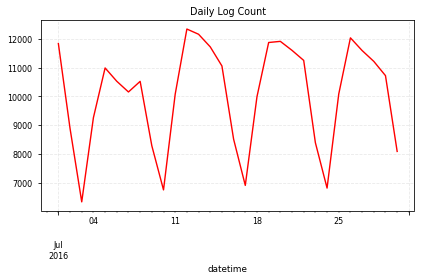

In [86]:
# daily log size
df.groupby("datetime").size().plot(c='r');

plt.title("Daily Log Count")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

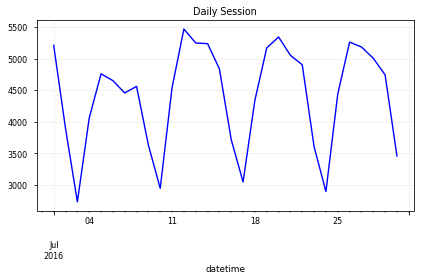

In [87]:
# daily session count => activness index
df.groupby("datetime")['sessionid'].nunique().plot(c='b');

plt.title("Daily Session")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

### Note. 
- 앱 사용에 seasonality 존재
- 로그수와 세션수의 트렌드가 유사

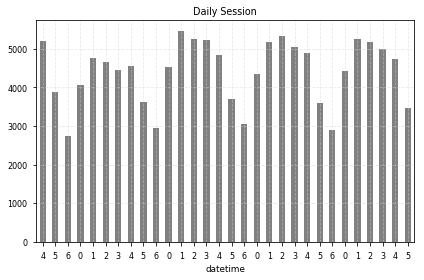

In [88]:
## daily session count (weekofday)
# 0: Monday, 6: Sunday

s = df.groupby("datetime")['sessionid'].nunique()
s.index = s.index.dayofweek

s.plot(color='grey', kind='bar', rot=0);

plt.title("Daily Session")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

### Note. 
- 주말에 사용성이 매우 감소하고 주중 초반이 높은편
- 문서앱이라는 특성상, 직장인 혹은 학생이 주로 사용할 것으로 가정하면 당연한 결과

- 탐색 내용
    - 일별, 확장자별 로그수
    - 일별, 위치별 로그수
    - 일별, 액션별 로그수
    - 일별, 화면 스크린별 유니크 유저수

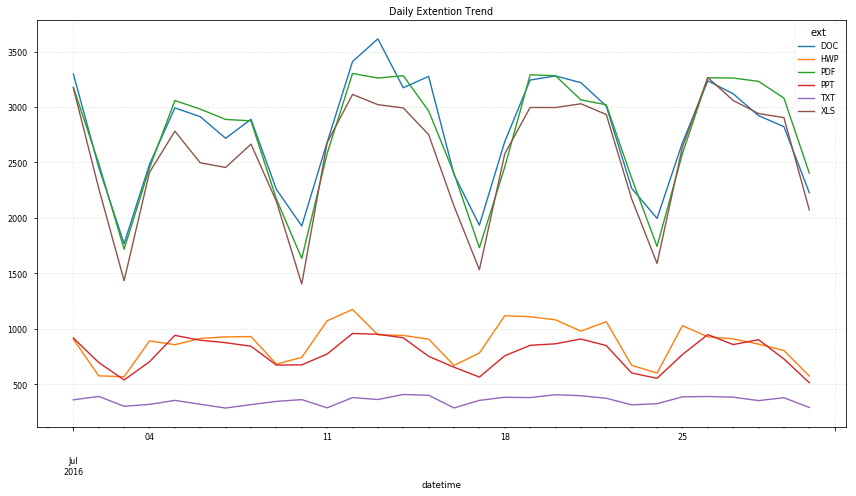

In [89]:
# daily trend by extention
df.groupby(["datetime", "ext"]).size().unstack().dropna(axis=1).plot(figsize=(12,7));

plt.title("Daily Extention Trend")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

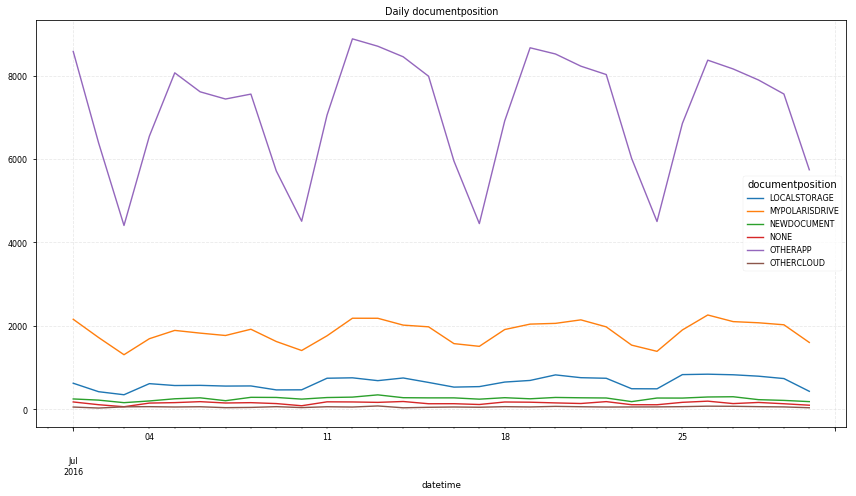

In [90]:
# daily trend by doc position
df.groupby(["datetime", "documentposition"]).size().unstack().dropna(axis=1).plot(figsize=(12,7));

plt.title("Daily documentposition")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

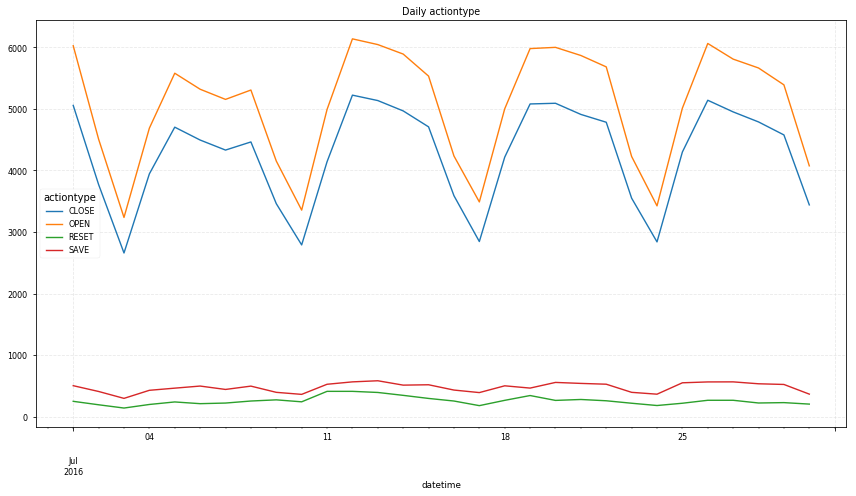

In [91]:
# daily trend by action type
df.groupby(["datetime", "actiontype"]).size().unstack().dropna(axis=1).plot(figsize=(12,7));

plt.title("Daily actiontype")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

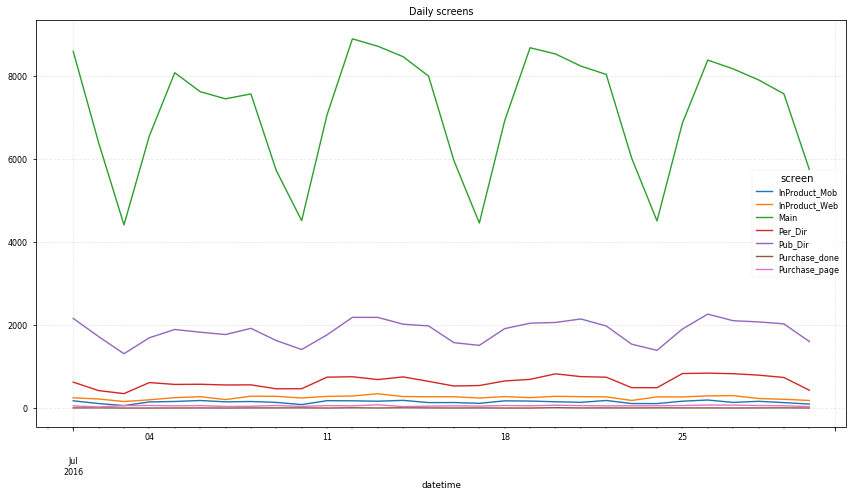

In [92]:
# daily trend by screen name
df.groupby(["datetime", "screen"]).size().unstack().fillna(0).astype(int).plot(figsize=(12,7));

plt.title("Daily screens")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [93]:
# heat map
screens = df.groupby(["datetime", "screen"])['sessionid'].nunique().unstack().fillna(0).astype(int)

# cols order change
screens = screens[screens.mean().sort_values(ascending=False).index]

screens[:10]

screen      Main  Pub_Dir  Per_Dir  InProduct_Web  InProduct_Mob  \
datetime                                                           
2016-07-01  3911     1112      381            178            143   
2016-07-02  2935      888      251            140             92   
2016-07-03  2005      648      197             85             50   
2016-07-04  3016      847      349            120            124   
2016-07-05  3631      942      354            159            127   
2016-07-06  3525      949      374            163            148   
2016-07-07  3433      896      324            133            127   
2016-07-08  3477      961      339            169            127   
2016-07-09  2605      865      277            178            110   
2016-07-10  2017      716      308            157             68   

screen      Purchase_page  Purchase_done  
datetime                                  
2016-07-01             24              2  
2016-07-02             15              2  
2016-07-03             33              0  
2016-07-04             32              0  
2016-07-05             28              1  
2016-07-06             31              1  
2016-07-07             18              0  
2016-07-08             23              2  
2016-07-09             30              2  
2016-07-10             18              2

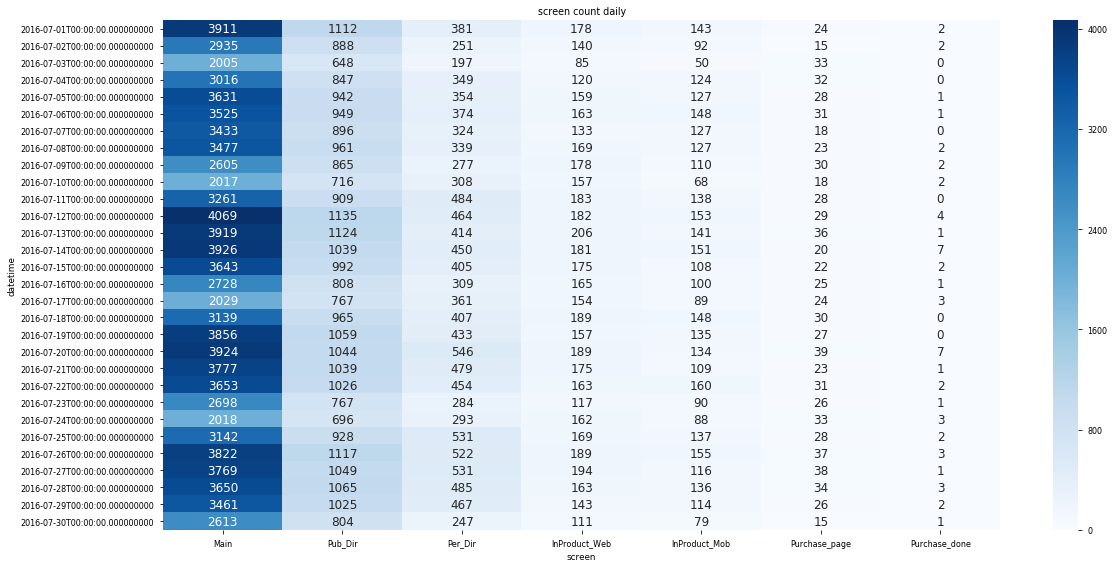

In [94]:
plt.subplots(figsize=(17,8))

sns.heatmap(screens, annot=True, fmt="d", annot_kws={"size": 12}, cmap='Blues');

plt.title("screen count daily")
plt.tight_layout()

### Note.
- doc, pdf, xls 순으로 주로 사용
- 주요 문서 이용 위치는 otherapp 
- Main -> 구매완료(purchase_done) 까지 과정에서 대부분 이탈

### 3.2 Pivoting 을 통한 변수별 특성 탐색
- unstack, stack, pivot_table 과 같은 pandas 함수를 이용해, 다양한 각도에서 데이터 탐색

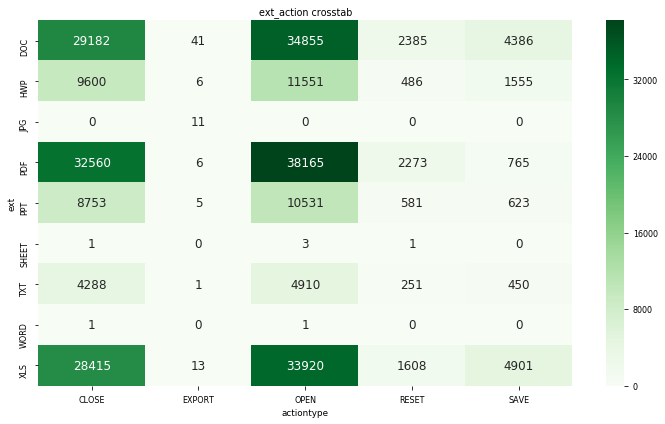

In [95]:
plt.subplots(figsize=(10,6))

ext_action = df.groupby(["ext", "actiontype"])['sessionid'].nunique().unstack().fillna(0).astype(int)
sns.heatmap(ext_action, annot=True, fmt="d", annot_kws={"size": 12}, cmap='Greens');

plt.title("ext_action crosstab")
plt.tight_layout()

In [96]:
# count to percent
df.groupby(["ext", "actiontype"])['sessionid'].nunique().unstack().fillna(0).apply(lambda x: x/x.sum()*100).round(2)

actiontype  CLOSE  EXPORT   OPEN  RESET   SAVE
ext                                           
DOC         25.87   49.40  26.02  31.44  34.59
HWP          8.51    7.23   8.62   6.41  12.26
JPG          0.00   13.25   0.00   0.00   0.00
PDF         28.87    7.23  28.49  29.97   6.03
PPT          7.76    6.02   7.86   7.66   4.91
SHEET        0.00    0.00   0.00   0.01   0.00
TXT          3.80    1.20   3.67   3.31   3.55
WORD         0.00    0.00   0.00   0.00   0.00
XLS         25.19   15.66  25.33  21.20  38.65

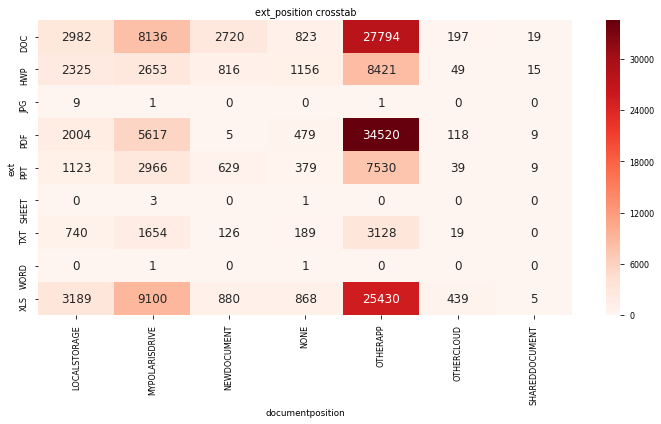

In [97]:
plt.subplots(figsize=(10,6))

ext_pos = df.groupby(["ext", "documentposition"])['sessionid'].nunique().unstack().fillna(0).astype(int)

sns.heatmap(ext_pos, annot=True, fmt="d", annot_kws={"size": 12}, cmap='Reds');

plt.title("ext_position crosstab")
plt.tight_layout()

### 3.3 변수별 분포 및 상관관계

In [98]:
df.head(10)

actiontype ismydoc  ext sessionid documentposition   datetime   screen
0       OPEN  NoView  PDF     sess0     LOCALSTORAGE 2016-07-18  Per_Dir
1      CLOSE  NoView  PDF     sess0     LOCALSTORAGE 2016-07-18  Per_Dir
2       OPEN    View  PDF     sess0   MYPOLARISDRIVE 2016-07-18  Pub_Dir
3      CLOSE    View  PDF     sess0   MYPOLARISDRIVE 2016-07-18  Pub_Dir
4       OPEN  NoView  PDF     sess1         OTHERAPP 2016-07-06     Main
5      RESET    View  PDF     sess1         OTHERAPP 2016-07-06     Main
6      CLOSE  NoView  PDF     sess2         OTHERAPP 2016-07-20     Main
7       OPEN  NoView  PDF     sess2         OTHERAPP 2016-07-20     Main
8       OPEN  NoView  PDF     sess3         OTHERAPP 2016-07-28     Main
9      CLOSE  NoView  PDF     sess3         OTHERAPP 2016-07-28     Main

### Quiz. 변수별 상관관계/분포를 파악하기 위한 분석단위는?  필요 함수는?

In [104]:
ext_by_session = df.query("actiontype == 'OPEN'").groupby(["sessionid", "ext"]).size().unstack().dropna(how='all')

ext_by_session.head()

ext        DOC  HWP  PDF  PPT  SHEET  TXT  WORD  XLS
sessionid                                           
sess0      NaN  NaN  2.0  NaN    NaN  NaN   NaN  NaN
sess1      NaN  NaN  1.0  NaN    NaN  NaN   NaN  NaN
sess10     NaN  2.0  NaN  NaN    NaN  NaN   NaN  NaN
sess100    NaN  NaN  NaN  NaN    NaN  NaN   NaN  1.0
sess1000   NaN  NaN  1.0  NaN    NaN  NaN   NaN  NaN

In [105]:
pos_by_session = df.query("actiontype == 'OPEN'").groupby(['sessionid', 'documentposition']).size().unstack().dropna(how='all')

pos_by_session.head()

documentposition  LOCALSTORAGE  MYPOLARISDRIVE  NEWDOCUMENT  OTHERAPP  \
sessionid                                                               
sess0                      1.0             1.0          NaN       NaN   
sess1                      NaN             NaN          NaN       1.0   
sess10                     NaN             1.0          NaN       1.0   
sess100                    NaN             NaN          NaN       1.0   
sess1000                   NaN             NaN          NaN       1.0   

documentposition  OTHERCLOUD  SHAREDDOCUMENT  
sessionid                                     
sess0                    NaN             NaN  
sess1                    NaN             NaN  
sess10                   NaN             NaN  
sess100                  NaN             NaN  
sess1000                 NaN             NaN

In [106]:
# Join => sessionid becomes unique (primary key)
exp_pos = pd.concat([ext_by_session, pos_by_session], axis=1).fillna(0)

exp_pos.head()

DOC  HWP  PDF  PPT  SHEET  TXT  WORD  XLS  LOCALSTORAGE  \
sessionid                                                            
sess0      0.0  0.0  2.0  0.0    0.0  0.0   0.0  0.0           1.0   
sess1      0.0  0.0  1.0  0.0    0.0  0.0   0.0  0.0           0.0   
sess10     0.0  2.0  0.0  0.0    0.0  0.0   0.0  0.0           0.0   
sess100    0.0  0.0  0.0  0.0    0.0  0.0   0.0  1.0           0.0   
sess1000   0.0  0.0  1.0  0.0    0.0  0.0   0.0  0.0           0.0   

           MYPOLARISDRIVE  NEWDOCUMENT  OTHERAPP  OTHERCLOUD  SHAREDDOCUMENT  
sessionid                                                                     
sess0                 1.0          0.0       0.0         0.0             0.0  
sess1                 0.0          0.0       1.0         0.0             0.0  
sess10                1.0          0.0       1.0         0.0             0.0  
sess100               0.0          0.0       1.0         0.0             0.0  
sess1000              0.0          0.0       1.0         0.0             0.0

In [107]:
exp_pos.describe().round(2)

DOC        HWP        PDF        PPT     SHEET        TXT  \
count  120657.00  120657.00  120657.00  120657.00  120657.0  120657.00   
mean        0.34       0.11       0.35       0.10       0.0       0.04   
std         0.59       0.35       0.55       0.35       0.0       0.21   
min         0.00       0.00       0.00       0.00       0.0       0.00   
25%         0.00       0.00       0.00       0.00       0.0       0.00   
50%         0.00       0.00       0.00       0.00       0.0       0.00   
75%         1.00       0.00       1.00       0.00       0.0       0.00   
max         6.00       6.00       4.00       5.00       1.0       4.00   

           WORD        XLS  LOCALSTORAGE  MYPOLARISDRIVE  NEWDOCUMENT  \
count  120657.0  120657.00     120657.00       120657.00    120657.00   
mean        0.0       0.31          0.07            0.21         0.04   
std         0.0       0.54          0.27            0.47         0.20   
min         0.0       0.00          0.00            0.00         0.00   
25%         0.0       0.00          0.00            0.00         0.00   
50%         0.0       0.00          0.00            0.00         0.00   
75%         0.0       1.00          0.00            0.00         0.00   
max         1.0       7.00          5.00            7.00         4.00   

        OTHERAPP  OTHERCLOUD  SHAREDDOCUMENT  
count  120657.00   120657.00       120657.00  
mean        0.93        0.01            0.00  
std         0.69        0.08            0.02  
min         0.00        0.00            0.00  
25%         1.00        0.00            0.00  
50%         1.00        0.00            0.00  
75%         1.00        0.00            0.00  
max         9.00        4.00            2.00

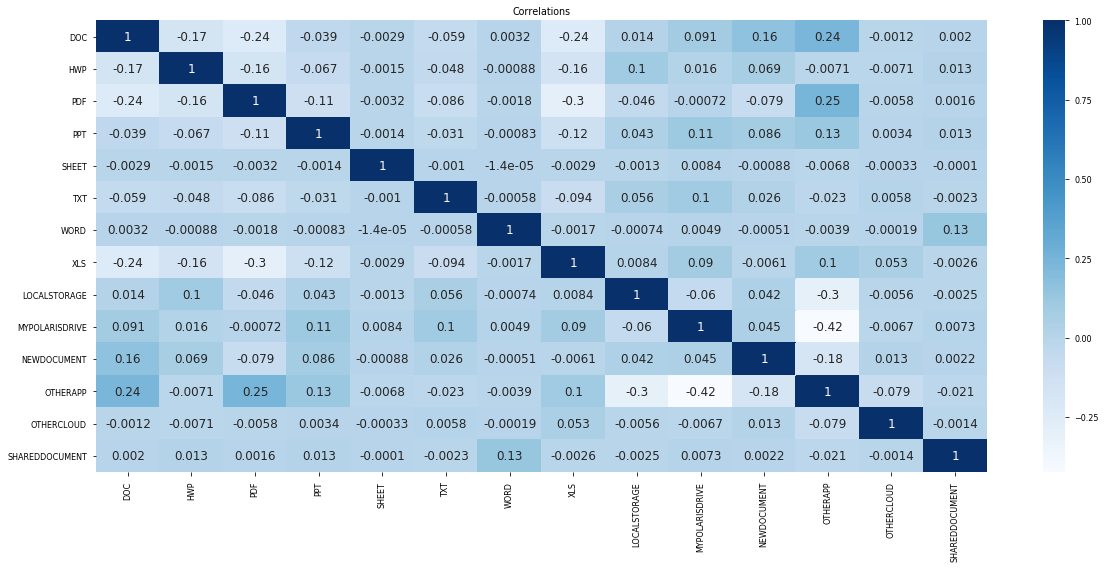

In [108]:
plt.subplots(figsize=(17,8))

sns.heatmap(exp_pos.corr(), annot=True, annot_kws={"size": 12}, cmap='Blues');

plt.title("Correlations")
plt.tight_layout()

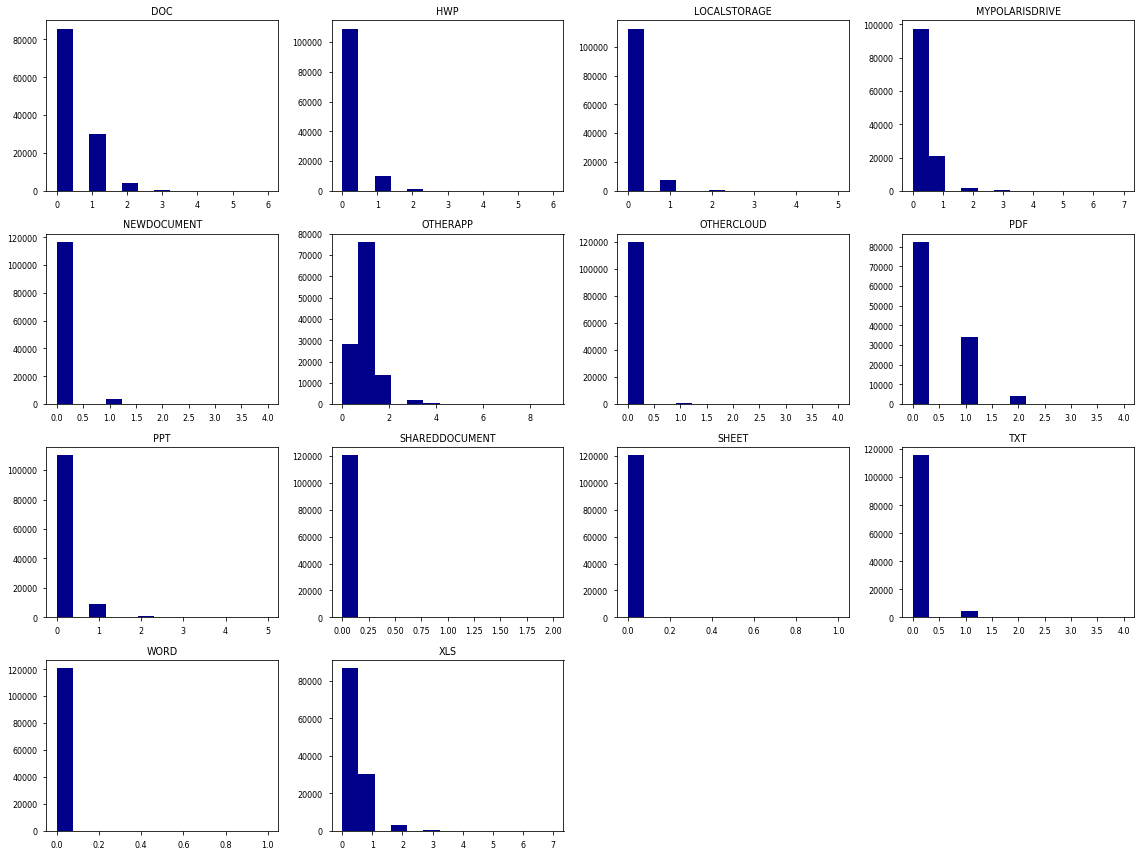

In [109]:
exp_pos.hist(bins=13, color='darkblue', figsize=(16,12), grid=False);

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

### 3.4 구간별 전환율 (Funnel) Daily Trend

In [110]:
screens.head(10) # daily session count by screen

screen      Main  Pub_Dir  Per_Dir  InProduct_Web  InProduct_Mob  \
datetime                                                           
2016-07-01  3911     1112      381            178            143   
2016-07-02  2935      888      251            140             92   
2016-07-03  2005      648      197             85             50   
2016-07-04  3016      847      349            120            124   
2016-07-05  3631      942      354            159            127   
2016-07-06  3525      949      374            163            148   
2016-07-07  3433      896      324            133            127   
2016-07-08  3477      961      339            169            127   
2016-07-09  2605      865      277            178            110   
2016-07-10  2017      716      308            157             68   

screen      Purchase_page  Purchase_done  
datetime                                  
2016-07-01             24              2  
2016-07-02             15              2  
2016-07-03             33              0  
2016-07-04             32              0  
2016-07-05             28              1  
2016-07-06             31              1  
2016-07-07             18              0  
2016-07-08             23              2  
2016-07-09             30              2  
2016-07-10             18              2

In [111]:
# mean of each columns
conver_cnt = screens.mean().apply(lambda x: int(x)).sort_values(ascending=False)

conver_cnt

screen
Main             3255
Pub_Dir           939
Per_Dir           390
InProduct_Web     161
InProduct_Mob     119
Purchase_page      27
Purchase_done       1
dtype: int64

In [112]:
# average conversion rate
for i in range(len(conver_cnt)-1):
    print((conver_cnt[i+1] / (conver_cnt[i] * 1.0) * 100).round(2))

28.85
41.53
41.28
73.91
22.69
3.7


In [113]:
# another option for gettig average conversion rate
conver_rt = [(conver_cnt[i+1] / (conver_cnt[i] * 1.0) * 100).round(2) for i in range(len(conver_cnt)) if i < 6]

conver_rt

[28.85, 41.53, 41.28, 73.91, 22.69, 3.7]

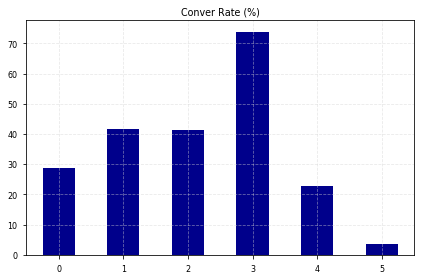

In [114]:
pd.Series(conver_rt).plot(kind='bar', color = 'darkblue', rot=0)

plt.title("Conver Rate (%)")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [115]:
# create x labels
fun_label = [conver_cnt.index[k] + " > " + conver_cnt.index[k + 1] for k, v in enumerate(conver_cnt.index) if k < 6]

fun_label

['Main > Pub_Dir',
 'Pub_Dir > Per_Dir',
 'Per_Dir > InProduct_Web',
 'InProduct_Web > InProduct_Mob',
 'InProduct_Mob > Purchase_page',
 'Purchase_page > Purchase_done']

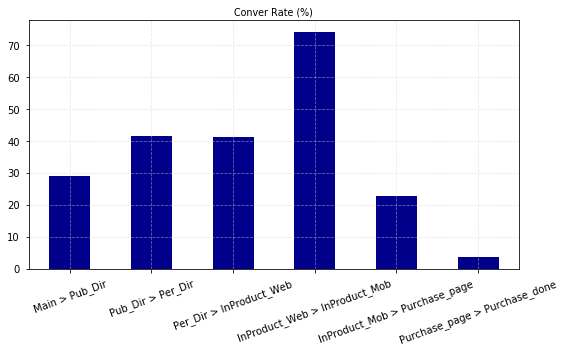

In [116]:
# with revised x labelsC
pd.Series(conver_rt, index=fun_label).plot(kind='bar', color = 'darkblue', rot=20, figsize=(8,5), fontsize=10)

plt.title("Conver Rate (%)")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

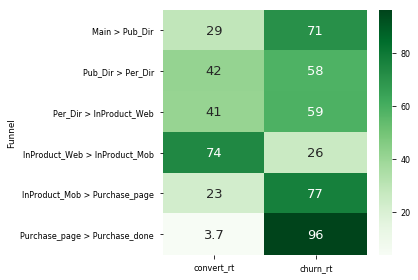

In [117]:
# another visualization
conv_rt_tb = pd.Series(conver_rt, index=fun_label).to_frame()
conv_rt_tb.index.name = 'Funnel'
conv_rt_tb.columns = ['convert_rt']
conv_rt_tb['churn_rt'] = 100 - conv_rt_tb['convert_rt']

sns.heatmap(conv_rt_tb, annot=True, annot_kws={"size": 13}, cmap='Greens');

plt.tight_layout()

- Another Visualization Example (via redash)

<img src="funnel_vis.png">

### 3.5 중간 정리
- **일별 주요 통계**
    - 활성화 세션의 경우 주말에 감소하고 주중에 증가하는 트렌드 보임
    - 확장자별 1 tier에는 pdf, xls, doc가 포지셔닝되며, 2 tier에는 hwp, ppt가 포함됨
    - 문서의 이용 위치는 'other app' 이 압도적으로 높음
    - 스크린별로 사용성 파악 결과, 메인(main) 화면이 가장 많이 노출되며 다음 화면(pub_dir or per_dir)으로 넘어가는 경우 많지 않음

- **구간별 전환율**
    - 전환율이 가장 낮은 구간(=이탈이 가장 높은 구간)은 구매정보 페이지에서 구매 완료 페이지로 전환하는 구간임(3.7%)
    - 제품내 웹 -> 앱으로 전환하는 구간은 전환율이 양호함(74%)

## 4. 클러스터링 For Targeting

### 4.0 심슨의 역설
- http://www.mathpark.com/530

### 4.1 What is K-MEANS?
 1. Select number of clusters, K
 2. Select K points as the initial centroids
 3. Repeat
 4. Form K clusters by assigning all points to the closest centroid
 5. Recompute the centroid of each cluster
 6. Until The centroids don't change 
 
- Reference link: http://rfriend.tistory.com/228 
![imge](https://t1.daumcdn.net/cfile/tistory/2649913A57A572321D) 

In [118]:
df.head()

actiontype ismydoc  ext sessionid documentposition   datetime   screen
0       OPEN  NoView  PDF     sess0     LOCALSTORAGE 2016-07-18  Per_Dir
1      CLOSE  NoView  PDF     sess0     LOCALSTORAGE 2016-07-18  Per_Dir
2       OPEN    View  PDF     sess0   MYPOLARISDRIVE 2016-07-18  Pub_Dir
3      CLOSE    View  PDF     sess0   MYPOLARISDRIVE 2016-07-18  Pub_Dir
4       OPEN  NoView  PDF     sess1         OTHERAPP 2016-07-06     Main

In [132]:
# 확장자만 기준으로 group by sessionid 하여 클러스터링을 위한 전처리 진행
# Note. if 다른 변수가 같이 있다면 scaling 필수
df_ext = df.query("actiontype == 'OPEN'").groupby(["sessionid", "ext"]).size().unstack().fillna(0)

df_ext.head(10)

ext         DOC  HWP  PDF  PPT  SHEET  TXT  WORD  XLS
sessionid                                            
sess0       0.0  0.0  2.0  0.0    0.0  0.0   0.0  0.0
sess1       0.0  0.0  1.0  0.0    0.0  0.0   0.0  0.0
sess10      0.0  2.0  0.0  0.0    0.0  0.0   0.0  0.0
sess100     0.0  0.0  0.0  0.0    0.0  0.0   0.0  1.0
sess1000    0.0  0.0  1.0  0.0    0.0  0.0   0.0  0.0
sess10000   0.0  0.0  1.0  0.0    0.0  0.0   0.0  0.0
sess100000  0.0  0.0  1.0  0.0    0.0  0.0   0.0  0.0
sess100001  1.0  0.0  0.0  0.0    0.0  0.0   0.0  0.0
sess100002  0.0  0.0  1.0  0.0    0.0  0.0   0.0  0.0
sess100003  0.0  0.0  1.0  0.0    0.0  0.0   0.0  0.0

In [133]:
df_ext_elbow = df_ext.copy()

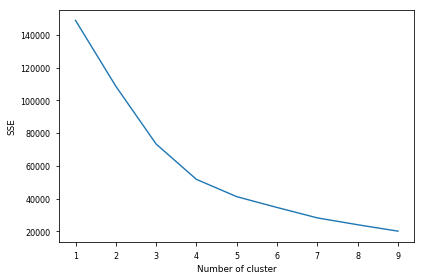

In [134]:
# scree plot with sum of square error
sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_ext_elbow)
    df_ext_elbow["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.tight_layout()
plt.show()

#### Note.
Silhouette Coefficient Method:
http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

In [135]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4).fit(df_ext)

In [136]:
labels = km.labels_

labels

array([1, 1, 0, ..., 2, 3, 1], dtype=int32)

In [137]:
df_ext['group'] = labels

In [139]:
df_ext.head()

ext        DOC  HWP  PDF  PPT  SHEET  TXT  WORD  XLS  group
sessionid                                                  
sess0      0.0  0.0  2.0  0.0    0.0  0.0   0.0  0.0      1
sess1      0.0  0.0  1.0  0.0    0.0  0.0   0.0  0.0      1
sess10     0.0  2.0  0.0  0.0    0.0  0.0   0.0  0.0      0
sess100    0.0  0.0  0.0  0.0    0.0  0.0   0.0  1.0      3
sess1000   0.0  0.0  1.0  0.0    0.0  0.0   0.0  0.0      1

In [140]:
df_ext.group.value_counts()

1    34870
2    34112
3    30109
0    21566
Name: group, dtype: int64

In [141]:
df_ext_mean = df_ext.groupby("group").mean().round(2)

df_ext_mean

ext     DOC   HWP   PDF   PPT  SHEET   TXT  WORD   XLS
group                                                 
0      0.00  0.57  0.01  0.39    0.0  0.19   0.0  0.00
1      0.01  0.01  1.12  0.03    0.0  0.01   0.0  0.04
2      1.18  0.00  0.09  0.06    0.0  0.02   0.0  0.07
3      0.01  0.01  0.01  0.02    0.0  0.01   0.0  1.13

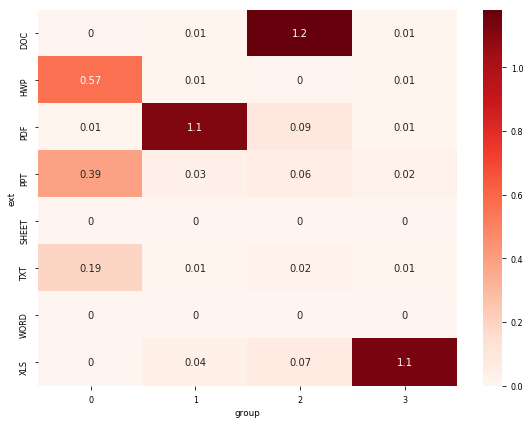

In [142]:
plt.subplots(figsize=(8,6))

sns.heatmap(df_ext_mean.T, annot=True, cmap='Reds')

plt.tight_layout()

####  Note. 

- Labeling 주의 (실행시마다 바뀜)

In [143]:
# be careful with the values; the group no. changes randomly
group_name = {0: 'gr_hwp',
              1: 'gr_pdf',
              2: 'gr_doc',
              3: 'gr_xls'}

In [144]:
df_ext['group'] = df_ext['group'].replace(group_name)

In [145]:
df_ext.head()

ext        DOC  HWP  PDF  PPT  SHEET  TXT  WORD  XLS   group
sessionid                                                   
sess0      0.0  0.0  2.0  0.0    0.0  0.0   0.0  0.0  gr_pdf
sess1      0.0  0.0  1.0  0.0    0.0  0.0   0.0  0.0  gr_pdf
sess10     0.0  2.0  0.0  0.0    0.0  0.0   0.0  0.0  gr_hwp
sess100    0.0  0.0  0.0  0.0    0.0  0.0   0.0  1.0  gr_xls
sess1000   0.0  0.0  1.0  0.0    0.0  0.0   0.0  0.0  gr_pdf

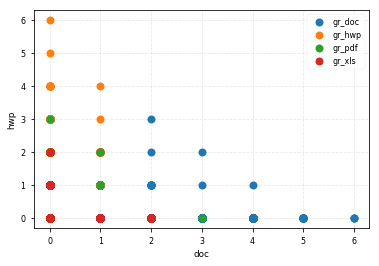

In [148]:
groups = df_ext.groupby("group")

fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group['DOC'], group['HWP'], marker='o', linestyle='', ms=8, label=name)
    ax.legend()

plt.xlabel("doc")
plt.ylabel("hwp")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.show()

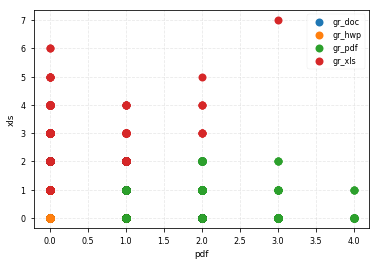

In [150]:
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group['PDF'], group['XLS'], marker='o', linestyle='', ms=8, label=name)
    ax.legend()

plt.xlabel("pdf")
plt.ylabel("xls")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.show()

### 클러스터별 전환율

In [152]:
df_open = df.query("actiontype == 'OPEN'")

df_open.head(10)

actiontype ismydoc  ext sessionid documentposition   datetime   screen
0        OPEN  NoView  PDF     sess0     LOCALSTORAGE 2016-07-18  Per_Dir
2        OPEN    View  PDF     sess0   MYPOLARISDRIVE 2016-07-18  Pub_Dir
4        OPEN  NoView  PDF     sess1         OTHERAPP 2016-07-06     Main
7        OPEN  NoView  PDF     sess2         OTHERAPP 2016-07-20     Main
8        OPEN  NoView  PDF     sess3         OTHERAPP 2016-07-28     Main
10       OPEN    View  PDF     sess3         OTHERAPP 2016-07-28     Main
11       OPEN  NoView  PDF     sess4         OTHERAPP 2016-07-19     Main
14       OPEN    View  PDF     sess5   MYPOLARISDRIVE 2016-07-24  Pub_Dir
16       OPEN  NoView  PDF     sess6         OTHERAPP 2016-07-24     Main
18       OPEN  NoView  HWP     sess7         OTHERAPP 2016-07-11     Main

In [153]:
df_ext.group.head()

sessionid
sess0       gr_pdf
sess1       gr_pdf
sess10      gr_hwp
sess100     gr_xls
sess1000    gr_pdf
Name: group, dtype: object

In [154]:
df_cluster = df_open.merge(df_ext[['group']].reset_index(), on='sessionid', how='left')

df_cluster.head(10)

actiontype ismydoc  ext sessionid documentposition   datetime   screen  \
0       OPEN  NoView  PDF     sess0     LOCALSTORAGE 2016-07-18  Per_Dir   
1       OPEN    View  PDF     sess0   MYPOLARISDRIVE 2016-07-18  Pub_Dir   
2       OPEN  NoView  PDF     sess1         OTHERAPP 2016-07-06     Main   
3       OPEN  NoView  PDF     sess2         OTHERAPP 2016-07-20     Main   
4       OPEN  NoView  PDF     sess3         OTHERAPP 2016-07-28     Main   
5       OPEN    View  PDF     sess3         OTHERAPP 2016-07-28     Main   
6       OPEN  NoView  PDF     sess4         OTHERAPP 2016-07-19     Main   
7       OPEN    View  PDF     sess5   MYPOLARISDRIVE 2016-07-24  Pub_Dir   
8       OPEN  NoView  PDF     sess6         OTHERAPP 2016-07-24     Main   
9       OPEN  NoView  HWP     sess7         OTHERAPP 2016-07-11     Main   

    group  
0  gr_pdf  
1  gr_pdf  
2  gr_pdf  
3  gr_pdf  
4  gr_pdf  
5  gr_pdf  
6  gr_pdf  
7  gr_pdf  
8  gr_pdf  
9  gr_xls

In [155]:
#define a function to get conversion rates
def conv_rt_by_grp(gr):
    df_gr_screen = df_cluster[df_cluster['group'] == gr]\
                     .groupby(["datetime", "screen"])['sessionid']\
                     .nunique().unstack().fillna(0).astype(int)
            
    conver_cnt = df_gr_screen.mean().apply(lambda x: int(x)).sort_values(ascending=False)
    conver_rt = [conver_cnt[i+1] / (conver_cnt[i] * 1.0) * 100 for i in range(len(conver_cnt)) if i < 5]
    fun_label = [conver_cnt.index[k] + " > " + conver_cnt.index[k + 1] for k, v in enumerate(conver_cnt.index) if k < 5]
    conver_rt = pd.Series(conver_rt, index=fun_label).fillna(0)
    
    return conver_rt

In [156]:
conv_rt_pdf = conv_rt_by_grp('gr_pdf')

conv_rt_pdf

Main > Pub_Dir                   15.369458
Pub_Dir > Per_Dir                29.487179
Per_Dir > InProduct_Web           6.521739
InProduct_Web > Purchase_page    66.666667
Purchase_page > Purchase_done     0.000000
dtype: float64

In [157]:
conv_rt_doc = conv_rt_by_grp('gr_doc')
conv_rt_doc

Main > Pub_Dir                   24.547511
Pub_Dir > InProduct_Web          34.562212
InProduct_Web > Per_Dir          88.000000
Per_Dir > Purchase_page           4.545455
Purchase_page > Purchase_done     0.000000
dtype: float64

In [158]:
conv_rt_xls = conv_rt_by_grp('gr_xls')
conv_rt_xls

Main > Pub_Dir                   34.135977
Pub_Dir > Per_Dir                27.385892
Per_Dir > InProduct_Web          30.303030
InProduct_Web > Purchase_page    55.000000
Purchase_page > Purchase_done     0.000000
dtype: float64

In [159]:
conv_rt_hwp = conv_rt_by_grp('gr_hwp')
conv_rt_hwp

Main > Pub_Dir                   31.958763
Pub_Dir > Per_Dir                55.483871
Per_Dir > InProduct_Web          37.209302
InProduct_Web > Purchase_page     6.250000
Purchase_page > Purchase_done     0.000000
dtype: float64

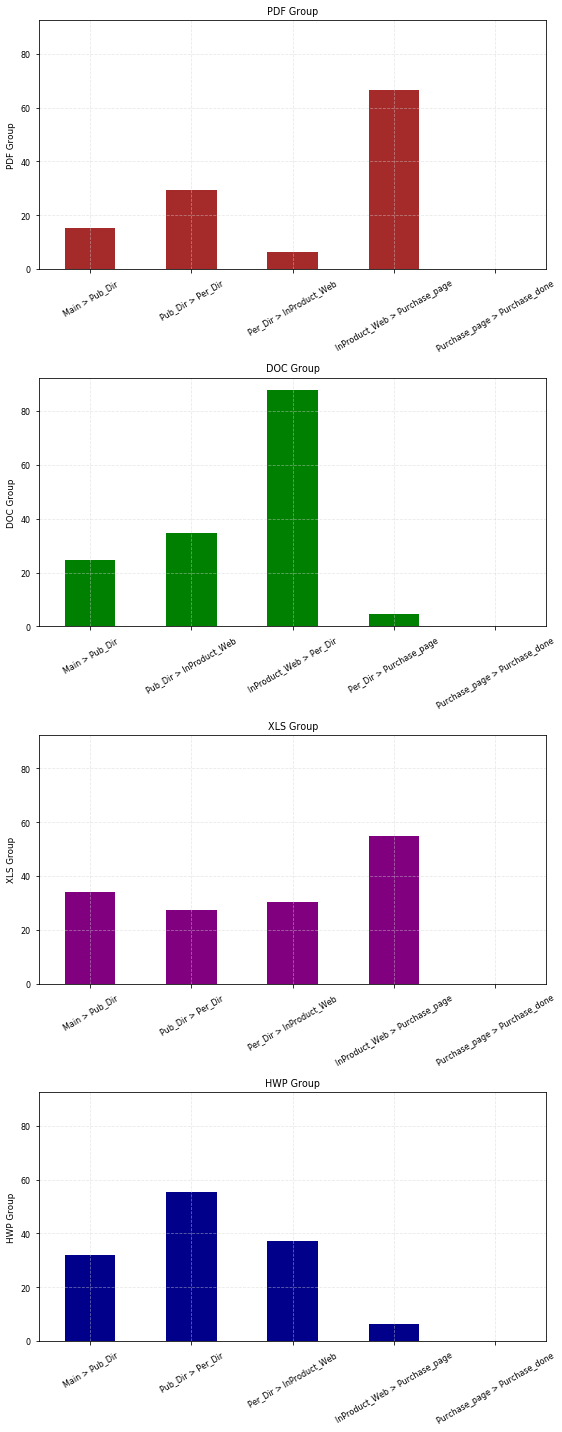

In [160]:
fig, ax = plt.subplots(4, 1, figsize=(8,20), sharey=True)

conv_rt_pdf.plot(kind='bar', ax=ax[0], color = 'brown', rot=30)
ax[0].set_title('PDF Group')
ax[0].set_ylabel('PDF Group')
ax[0].grid(color='lightgrey', alpha=0.5, linestyle='--')

conv_rt_doc.plot(kind='bar', ax=ax[1], color = 'green', rot=30)
ax[1].set_ylabel('DOC Group')
ax[1].set_title('DOC Group')
ax[1].grid(color='lightgrey', alpha=0.5, linestyle='--')

conv_rt_xls.plot(kind='bar', ax=ax[2], color = 'purple', rot=30)
ax[2].set_ylabel('XLS Group')
ax[2].set_title('XLS Group')
ax[2].grid(color='lightgrey', alpha=0.5, linestyle='--')

conv_rt_hwp.plot(kind='bar', ax=ax[3], color = 'darkblue', rot=30)
ax[3].set_ylabel('HWP Group')
ax[3].set_title('HWP Group')
ax[3].grid(color='lightgrey', alpha=0.5, linestyle='--')

plt.tight_layout()

In [162]:
# 그룹별 평균 전환율
gr_pdf_avg = conv_rt_pdf.replace(0, np.nan).mean()
gr_doc_avg = conv_rt_doc.replace(0, np.nan).mean()
gr_xls_avg = conv_rt_xls.replace(0, np.nan).mean()
gr_hwp_avg = conv_rt_hwp.replace(0, np.nan).mean()

print("pdf", gr_pdf_avg)
print("doc", gr_doc_avg)
print("xls", gr_xls_avg)
print("hwp", gr_hwp_avg)

('pdf', 29.511260853089937)
('doc', 37.91379445980964)
('xls', 36.70622493908084)
('hwp', 32.72548404498032)


In [163]:
print(conv_rt_pdf)

Main > Pub_Dir                   15.369458
Pub_Dir > Per_Dir                29.487179
Per_Dir > InProduct_Web           6.521739
InProduct_Web > Purchase_page    66.666667
Purchase_page > Purchase_done     0.000000
dtype: float64


In [164]:
# 가중치 임의 설정
weights = [1, 1.3, 1.5, 2, 2.5]

# 가중 평균
def weight_avg(gr):
    w_avg = (gr.values * weights).sum() / len(gr)
    return w_avg

In [165]:
gr_pdf_w = weight_avg(conv_rt_pdf)
gr_doc_w = weight_avg(conv_rt_doc)
gr_xls_w = weight_avg(conv_rt_xls)
gr_hwp_w = weight_avg(conv_rt_hwp)

print("pdf:", gr_pdf_w)
print("doc:", gr_doc_w)
print("xls:", gr_xls_w)
print("hwp:", gr_hwp_w)

('pdf:', 39.36374669807953)
('doc:', 42.11385919583263)
('xls:', 45.03843650853866)
('hwp:', 34.48034972660691)


In [166]:
avg_df = pd.DataFrame(list(zip([gr_pdf_avg, gr_doc_avg, gr_xls_avg, gr_hwp_avg],\
                                   [gr_pdf_w, gr_doc_w, gr_xls_w, gr_hwp_w])), \
                                   columns = ['mean', 'wg_mean'],\
                                   index = ['gr_pdf', 'gr_doc', 'gr_xls', 'gr_hwp'])

avg_df

mean    wg_mean
gr_pdf  29.511261  39.363747
gr_doc  37.913794  42.113859
gr_xls  36.706225  45.038437
gr_hwp  32.725484  34.480350

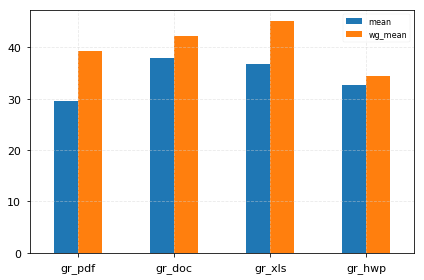

In [167]:
avg_df.plot(kind='bar', fontsize=11, rot=0)

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()